In [26]:
import pandas as pd
import numpy as np

df=pd.read_csv("/home/Ima/work/Dataset/Cycle-2/Main_Challenge/training.1600000.processed.noemoticon.csv", encoding="latin-1",header=None)

In [27]:
df.columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']
df = df[['sentiment', 'text']]
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [28]:
import re

def clean_tweet(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)     
    text = re.sub(r"#", "", text)        
    text = re.sub(r"[^a-zA-Z\s]", "", text)  
    text = text.lower()  
    return text.strip()

df["clean_text"] = df["text"].apply(clean_tweet)
df[["text", "clean_text"]].head()

,text,clean_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats a bummer you shoulda got david car...
1,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...
3,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...


In [29]:
label_map = {0: "negative", 2: "neutral", 4: "positive"}
df["sentiment_label"] = df["sentiment"].map(label_map)

numeric_map = {0: -1, 2: 0, 4: 1}
df["sentiment_numeric"] = df["sentiment"].map(numeric_map)

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(df['clean_text'])

print("TF-IDF matrix shape:", X_tfidf.shape)

TF-IDF matrix shape: (1600000, 5000)


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['sentiment'], test_size=0.2, random_state=42, stratify=df['sentiment'])
model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial', n_jobs=-1)
model.fit(X_train, y_train)


/home/Ima/work/acm/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1262: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'multinomial'


Accuracy: 0.7903


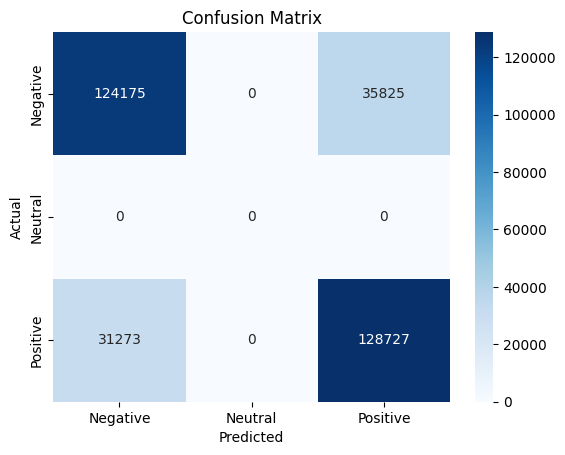

In [32]:
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=[0, 2, 4])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.80      0.78      0.79    160000
    Positive       0.78      0.80      0.79    160000

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



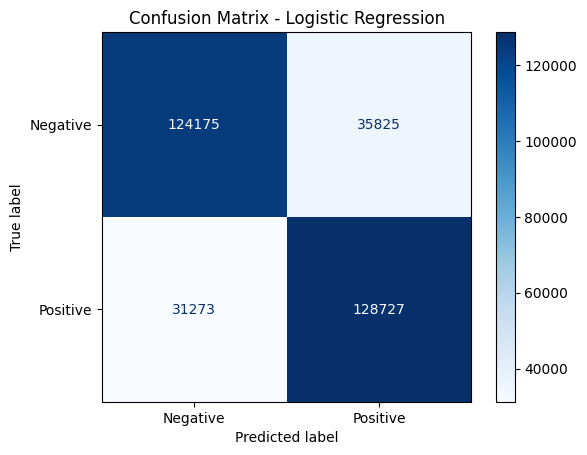

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred, labels=[0, 4])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

### 📘 Final Summary – Logistic Regression Sentiment Classifier

- **Model Used:** Logistic Regression
- **Vectorizer:** TF-IDF with top 5,000 features
- **Dataset:** Sentiment140 (only Positive and Negative tweets)
- **Train-Test Split:** 80% train, 20% test
- **Test Accuracy:** 79%

**Why Logistic Regression?**
- It's fast, interpretable, and works well with high-dimensional sparse data like TF-IDF vectors.

**How TF-IDF Helped**
- TF-IDF gave more weight to meaningful words (e.g., “love”, “hate”) and less to common words like “the” or “is”.

**Challenges Faced**
- Neutral tweets (label `2`) were missing in this version of the dataset, so we converted it into a binary classification task.
- Cleaning tweets (URLs, mentions, emojis) required careful regex handling.

Overall, the model shows strong and balanced performance for detecting sentiment from tweets.
